In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from scipy.signal import lfilter

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy
from keras.datasets import imdb
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tensorflow.keras import activations

from keras.layers import Activation, Dense

from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.layers import Dense, Softmax, Dropout, BatchNormalization

In [3]:
import sys
from pathlib import Path
# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)
from preprocessing import import_preprocessed_data
from train import create_windows_smoothed, create_train_val_test_split
from predict import predict_values, predict_values_with_gradient

Import all data

In [4]:
dfs_c_0, dfs_c_1, dfs_c_2, dfs_c_0_grouped, dfs_c_1_grouped, dfs_c_2_grouped = import_preprocessed_data() # import all data

In [5]:
all_ungrouped = []
all_ungrouped = [*dfs_c_0, *dfs_c_1, *dfs_c_2]

In [6]:
# create lstm input
X,y = create_windows_smoothed(all_ungrouped, 50, 1, 25)
#Split data into train & test set & validation set 
X_train, y_train, X_test, y_test, X_val, y_val = create_train_val_test_split(X,y)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(7247, 50, 1)
(7247, 1)
(1812, 50, 1)
(1812, 1)
(2265, 50, 1)
(2265, 1)


In [8]:
#  build lstm 
model2 = Sequential()
model2.add(LSTM(200, return_sequences=True, input_shape= (50, 1)))
model2.add(LSTM(200))
model2.add(Dense(1, activation='relu'))

#optimizer = optimizers.Adam(clipvalue=0.5)
adam = tf.keras.optimizers.Adam(learning_rate=0.001) # , clipnorm=1
model2.compile(optimizer=adam, loss='mse',metrics=['mean_absolute_error'])

In [12]:
model2.fit(X_train_2, y_train_2, epochs=20, batch_size=128, validation_data=(X_test_2, y_test_2), verbose=1, shuffle=True)

Epoch 1/20
64/64 [==============================] - 45s 427ms/step - loss: 6952.6428 - mean_absolute_error: 77.8759 - val_loss: 4677.6265 - val_mean_absolute_error: 62.3678
Epoch 2/20
64/64 [==============================] - 28s 436ms/step - loss: 4377.0430 - mean_absolute_error: 60.3227 - val_loss: 3307.4644 - val_mean_absolute_error: 50.5663
Epoch 3/20
64/64 [==============================] - 30s 465ms/step - loss: 3076.7255 - mean_absolute_error: 48.8747 - val_loss: 2339.4900 - val_mean_absolute_error: 41.0541
Epoch 4/20
64/64 [==============================] - 27s 415ms/step - loss: 2176.3857 - mean_absolute_error: 39.6788 - val_loss: 1651.8085 - val_mean_absolute_error: 33.1282
Epoch 5/20
64/64 [==============================] - 24s 368ms/step - loss: 1573.6185 - mean_absolute_error: 32.4684 - val_loss: 1170.8704 - val_mean_absolute_error: 26.7442
Epoch 6/20
64/64 [==============================] - 32s 501ms/step - loss: 1072.8876 - mean_absolute_error: 25.5451 - val_loss: 835.427

A model with the same configuration was trained on google colab and is imported here.

In [9]:
from keras.models import load_model
model = load_model('../models/overall_lstm.h5')

In [10]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 50, 200)           161600    
_________________________________________________________________
lstm_13 (LSTM)               (None, 200)               320800    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 201       
Total params: 482,601
Trainable params: 482,601
Non-trainable params: 0
_________________________________________________________________


Predict 500 values based on a test set.

In [11]:
initial_set = X_val[0]
initial_set

array([[129.8       ],
       [129.46666667],
       [129.13333333],
       [128.86666667],
       [128.6       ],
       [128.26666667],
       [127.93333333],
       [127.6       ],
       [127.4       ],
       [127.26666667],
       [127.        ],
       [126.53333333],
       [126.06666667],
       [125.53333333],
       [125.13333333],
       [125.06666667],
       [124.73333333],
       [124.33333333],
       [124.        ],
       [123.66666667],
       [123.26666667],
       [122.93333333],
       [122.86666667],
       [122.86666667],
       [122.8       ],
       [122.73333333],
       [122.73333333],
       [122.73333333],
       [122.8       ],
       [122.8       ],
       [122.86666667],
       [122.8       ],
       [122.8       ],
       [122.86666667],
       [122.8       ],
       [122.73333333],
       [122.73333333],
       [122.8       ],
       [122.73333333],
       [122.8       ],
       [122.8       ],
       [122.86666667],
       [122.66666667],
       [122

In [12]:
result = predict_values(model, initial_set, 500, 50) # predict 500 values 

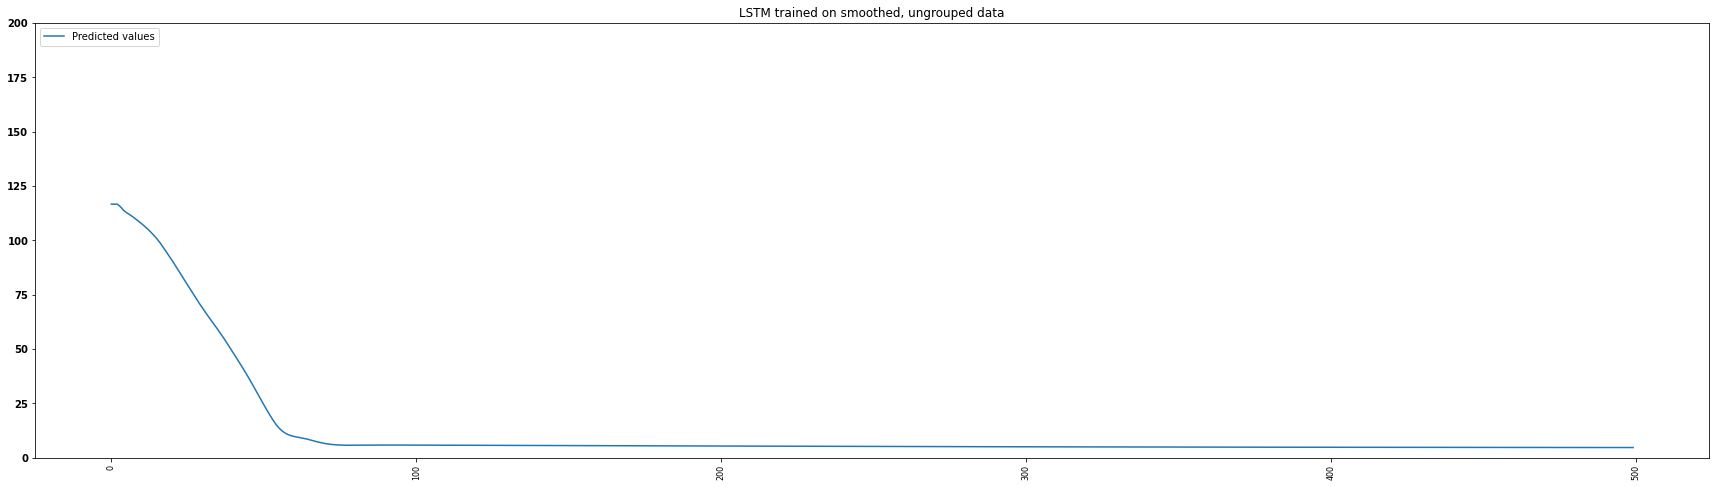

In [13]:
plt.figure(figsize=(30,8))
plt.ylim((0,200))
plt.title("LSTM trained on smoothed, ungrouped data")

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')
plt.plot(result)

plt.legend(['Predicted values'], loc='upper left')

plt.show()

Now we predict on values of an empty container and reset the input sequence when the container is full.

In [14]:
initial_set2 = []
for i in range(1, 51, 1):
  initial_set2.append(140)
initial_set2 = np.array(initial_set2)
initial = initial_set2
initial_set2

array([140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140,
       140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140,
       140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140,
       140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140])

In [15]:
result2 = predict_values_with_gradient(model, initial_set, initial, 500, 50) # predict 500 values with reset of the values when Height is near 0

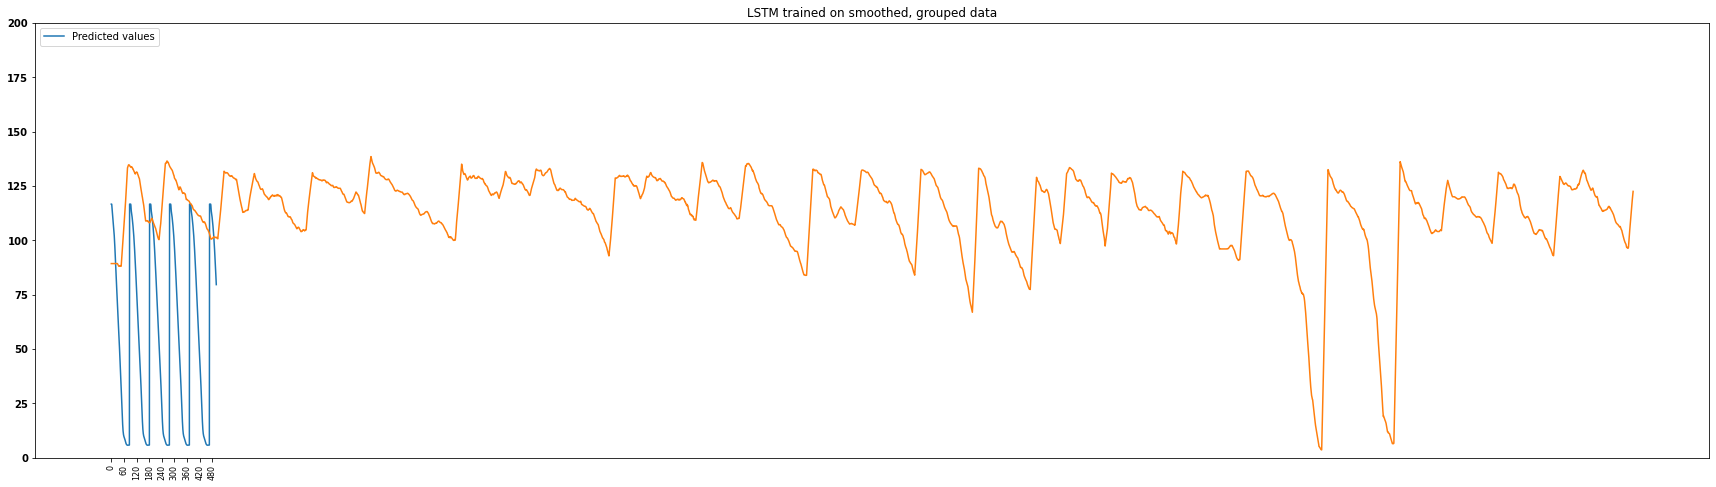

In [16]:
plt.figure(figsize=(30,8))
plt.ylim((0,200))
plt.title("LSTM trained on smoothed, grouped data")

plt.xticks(np.arange(0, 500, step=60), fontsize=8, rotation=90, )
plt.yticks(fontsize=10, fontweight='bold')
plt.plot(result2)
plt.plot(dfs_c_0[0]['inter_pol'])

plt.legend(['Predicted values'], loc='upper left')

plt.show()

Result: The model does not learn the data correct on data that is given for every hour. We achieve a better result on daily data.